<h1 style="font-size:300%">Spotify Song Ranking Predictor</h1>

# Intro 
Martin Hristev

# Importing Necessary Libraries

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)
print("Matplotlib version:", matplotlib.__version__)

Pandas version: 2.2.1
Seaborn version: 0.13.2
Matplotlib version: 3.8.3


# 3. Loading and Exploring the Data

In [84]:
try:
    df = pd.read_csv('./raw_data/universal_top_spotify_songs.csv')
except Exception as e:
    print("An error occurred while reading the CSV file:", e)
    df = None 

df.shape

(525027, 25)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525027 entries, 0 to 525026
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   spotify_id          525027 non-null  object 
 1   name                525004 non-null  object 
 2   artists             525004 non-null  object 
 3   daily_rank          525027 non-null  int64  
 4   daily_movement      525027 non-null  int64  
 5   weekly_movement     525027 non-null  int64  
 6   country             517871 non-null  object 
 7   snapshot_date       525027 non-null  object 
 8   popularity          525027 non-null  int64  
 9   is_explicit         525027 non-null  bool   
 10  duration_ms         525027 non-null  int64  
 11  album_name          524832 non-null  object 
 12  album_release_date  524832 non-null  object 
 13  danceability        525027 non-null  float64
 14  energy              525027 non-null  float64
 15  key                 525027 non-nul

In [86]:
df.describe()

,daily_rank,daily_movement,weekly_movement,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,525027.000000,525027.000000,525027.000000,525027.000000,525027.000000,525027.000000,525027.000000,525027.000000,525027.000000,525027.000000,525027.000000,525027.000000,525027.000000,525027.000000,525027.000000,525027.000000,525027.000000
mean,25.485581,0.682144,2.905866,77.953513,193772.007282,0.680442,0.646541,5.391083,-6.588387,0.526078,0.097997,0.286679,0.016554,0.176633,0.537978,122.458034,3.892659
std,14.427087,6.463425,12.091318,15.828934,49828.781799,0.141381,0.164093,3.500116,2.686815,0.499320,0.092539,0.260842,0.088189,0.129785,0.229887,28.526451,0.441665
min,1.000000,-49.000000,-49.000000,0.000000,0.000000,0.000000,0.001890,0.000000,-31.356000,0.000000,0.000000,0.000008,0.000000,0.015400,0.000000,0.000000,0.000000
25%,13.000000,-1.000000,-3.000000,67.000000,162461.000000,0.580000,0.544000,2.000000,-8.020000,0.000000,0.039300,0.076200,0.000000,0.098000,0.362000,99.974000,4.000000
50%,25.000000,0.000000,0.000000,82.000000,186666.000000,0.700000,0.668000,6.000000,-6.238000,1.000000,0.059000,0.190000,0.000001,0.121000,0.533000,119.935000,4.000000
75%,38.000000,2.000000,5.000000,90.000000,218998.000000,0.788000,0.762000,8.000000,-4.781000,1.000000,0.115000,0.453000,0.000079,0.219000,0.726000,141.095000,4.000000
max,50.000000,49.000000,49.000000,100.000000,939666.000000,0.988000,0.997000,11.000000,3.233000,1.000000,0.912000,0.996000,0.974000,0.968000,0.992000,217.969000,5.000000


In [87]:
df.sample(10)

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
320592,5aIVCx5tnk0ntmdiinnYvw,Water,Tyla,49,1,0,CH,2023-12-13,95,False,...,3,-3.495,0,0.0755,0.0856,0.000000,0.1370,0.519,117.187,4
489582,3hUxzQpSfdDqwM3ZTFQY0K,august,Taylor Swift,43,-2,-6,PH,2023-10-27,92,False,...,5,-9.208,1,0.0331,0.5380,0.000073,0.0925,0.403,89.937,4
296639,6irysuQyZWd7Bjj7ePiOs2,Holanda,Jhayco,46,-3,-3,PE,2023-12-19,88,True,...,1,-3.627,0,0.0502,0.2770,0.000000,0.1250,0.244,107.961,4
152406,0kjH0WcUn6hzQxbwW03vjq,Que La Choque,Rochy RD,27,8,11,DO,2024-01-28,64,False,...,5,-6.550,1,0.2980,0.2070,0.000000,0.1470,0.912,119.285,4
304053,0fKwOY2Z6oB9ntoNDR13nP,Jul i svingen,"Ingebjørg Bratland, Ina Svenningdal",10,0,0,NO,2023-12-17,60,False,...,9,-8.821,1,0.0250,0.4650,0.000014,0.0665,0.574,145.941,4
95386,1atD9QMSoZjgKiUKKopZBW,วาสนาผู้ใด,Parkmalody,50,-3,0,TH,2024-02-12,68,False,...,1,-9.026,1,0.0708,0.2660,0.000000,0.1470,0.390,95.937,4
54117,0T2pB7P1VdXPhLdQZ488uH,Normal,Feid,26,-2,-6,CO,2024-02-24,85,True,...,4,-4.867,0,0.1710,0.0340,0.000000,0.3150,0.541,170.082,4
112356,3ilgxZl5g7MOQCUiky3VOG,Ms. Jackson,Pashanim,20,0,-3,DE,2024-02-08,78,False,...,1,-7.334,1,0.2660,0.1630,0.000032,0.1690,0.624,81.990,4
421234,5omIW7YOPhA6CULhkdz6jE,Paradiso Artificiale (feat. Baby Gang & Kid Yugi),"Tedua, Baby Gang, Kid Yugi",36,3,14,IT,2023-11-15,74,False,...,10,-7.624,0,0.1140,0.3260,0.000000,0.2050,0.567,104.522,4
425331,5p3F8ZyKGGGp4IZYRBr4pI,Zurbaran,TOQUEL,4,0,46,GR,2023-11-14,62,True,...,4,-9.664,0,0.2170,0.1070,0.000001,0.2890,0.288,143.971,4


# 4. Data Cleaning and Preprocessing

To ensure the project focuses on the Global Spotify ranking, it is necessary to exclude all records associated with specific countries. Having `N/A` value in `country` column means that the ranking is `Global`.


In [88]:
df = df[df['country'].isna()]
df.shape

(7156, 25)

Get only the highest rank for each song, as we want the model to predict the song's highest achievable rank.

In [89]:
df = df.loc[df.groupby("spotify_id")['daily_rank'].idxmin()]
df.shape

(272, 25)

Checking for missing values.

In [90]:
df.isna().sum()

spotify_id              0
name                    0
artists                 0
daily_rank              0
daily_movement          0
weekly_movement         0
country               272
snapshot_date           0
popularity              0
is_explicit             0
duration_ms             0
album_name              1
album_release_date      1
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
dtype: int64

Check the missing values in the album section

In [91]:
df[df['album_name'].isnull()]

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
266368,4HEOgBHRCExyYVeTyrXsnL,Jingle Bells - Remastered 1999,Frank Sinatra,25,3,25,NaN,2023-12-27,88,False,...,8,-13.119,1,0.0498,0.727,0.0,0.0977,0.951,174.609,4


We can conveniently search and retrieve the missing values from Spotify itself, ensuring that no data is lost.

In [92]:
df['album_name'] = df['album_name'].fillna('A Jolly Christmas From Frank Sinatra')
df['album_release_date'] = df['album_release_date'].fillna('1957-09-21')

Confirm that all missing values have been resolved.

In [93]:
df.isna().sum()

spotify_id              0
name                    0
artists                 0
daily_rank              0
daily_movement          0
weekly_movement         0
country               272
snapshot_date           0
popularity              0
is_explicit             0
duration_ms             0
album_name              0
album_release_date      0
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
dtype: int64

Check for duplicated rows

In [94]:
df[df.duplicated()].sum()

spotify_id              0
name                    0
artists                 0
daily_rank              0
daily_movement          0
weekly_movement         0
country                 0
snapshot_date           0
popularity              0
is_explicit             0
duration_ms             0
album_name              0
album_release_date      0
danceability          0.0
energy                0.0
key                     0
loudness              0.0
mode                    0
speechiness           0.0
acousticness          0.0
instrumentalness      0.0
liveness              0.0
valence               0.0
tempo                 0.0
time_signature          0
dtype: object

Replace the boolean values True and False in the 'is_explicit' column with the corresponding integer values 1 and 0.

In [95]:
df['is_explicit'] = df['is_explicit'].map({True: 1, False: 0})

Convert the dates to datetime format for easier manipulation and analysis.

In [96]:
df['album_release_date'] = pd.to_datetime(df['album_release_date'])
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'])

Create a new column to represent the number of days since the song's release and include the release year information.

In [97]:
df['release_year'] = df['album_release_date'].dt.year
df['days_since_release'] = (df['snapshot_date'] - df['album_release_date']).dt.days

Convert the song duration from milliseconds to minutes.

In [98]:
df['duration_min']= round(df['duration_ms'] / (1000*60), 2)

Drop irrelevant columns.

In [99]:
df.drop(labels=["spotify_id", 
                "artists", 
                "name", 
                "country", 
                "daily_movement",
                "weekly_movement",
                "album_name",
                "duration_ms",
                "album_release_date",
                "snapshot_date",
                "popularity",
                ], axis=1, inplace=True)


To provide a clear and accurate representation of the data, we have renamed the column `daily rank` to `highest rank`. This renaming is necessary because we have filtered the dataset to include only the highest rank for each song.

In [100]:
df.rename(columns={'daily_rank': 'highest_rank'}, inplace=True)

# 5. Feature Selection

To analyze the correlations between the features and the `highest_rank` column, we generate a heatmap. This heatmap provides a visual representation of the relationships between the variables in the dataset.

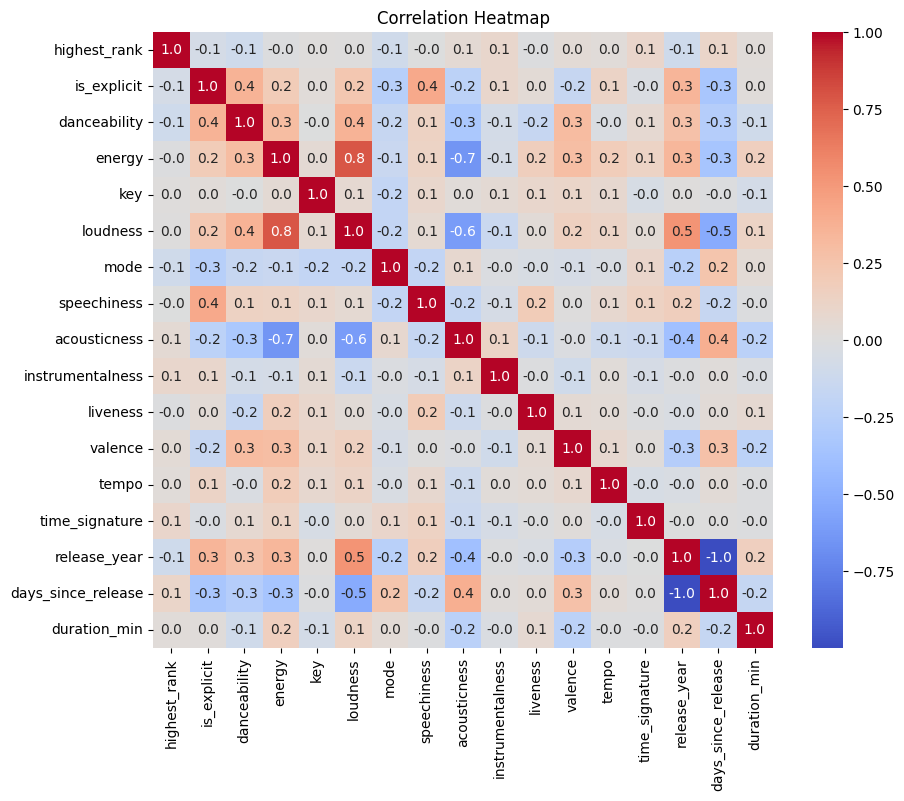

In [101]:
correlations = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

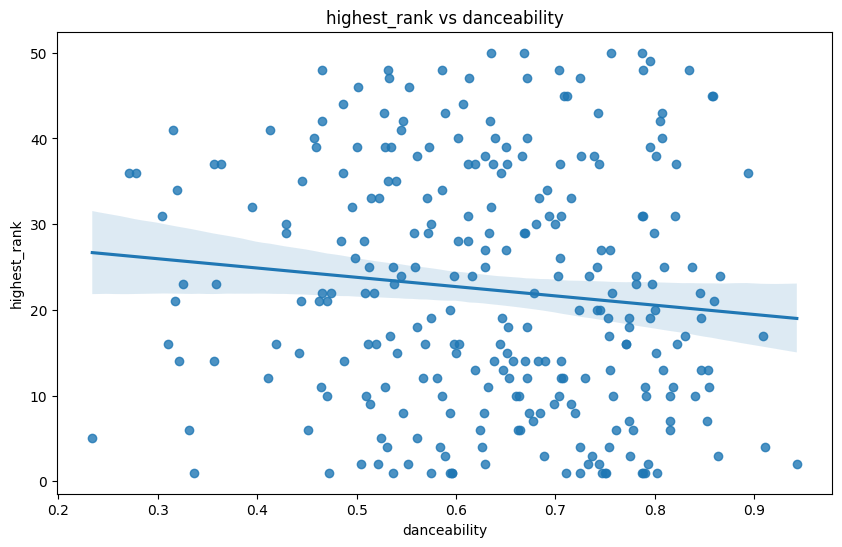

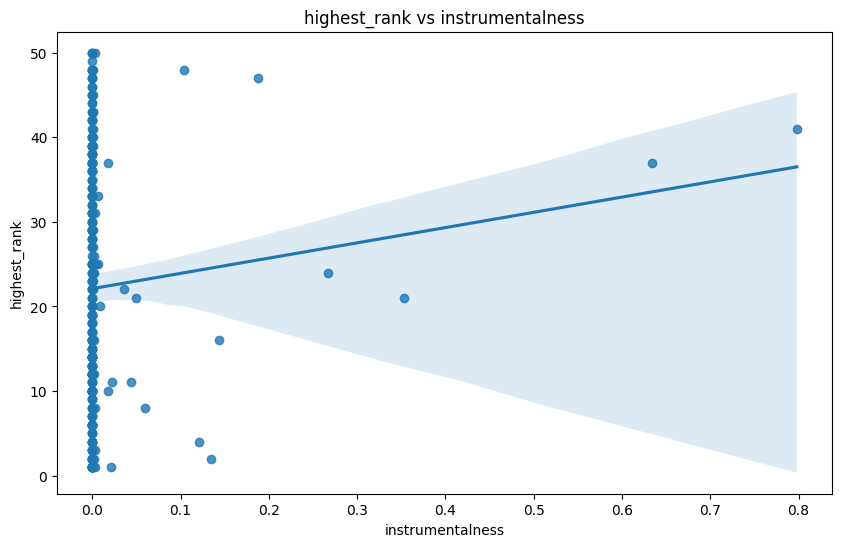

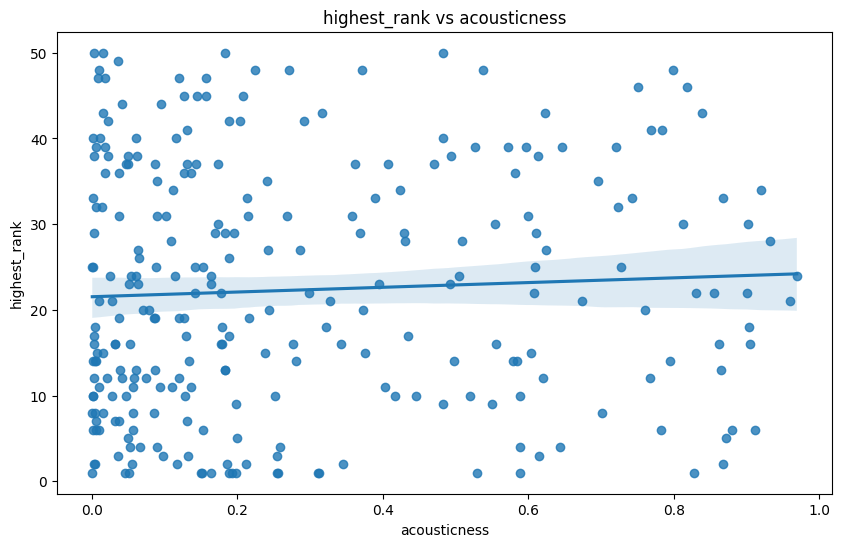

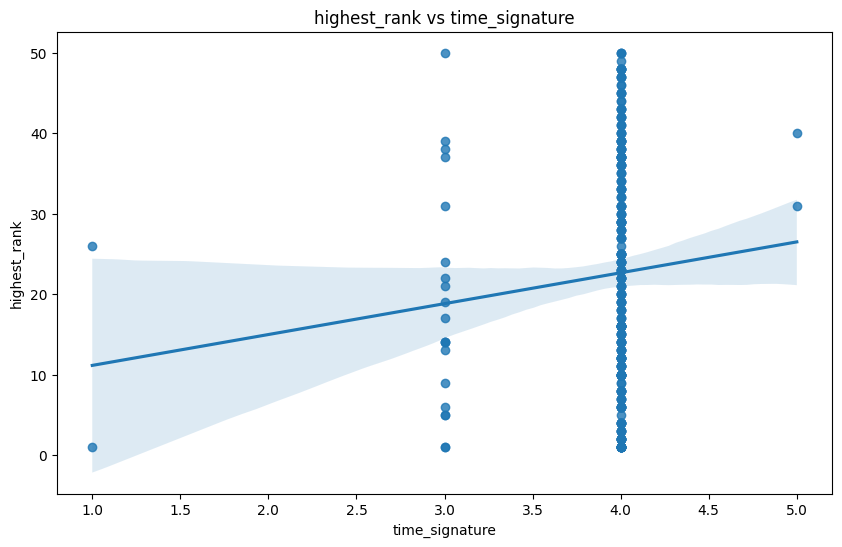

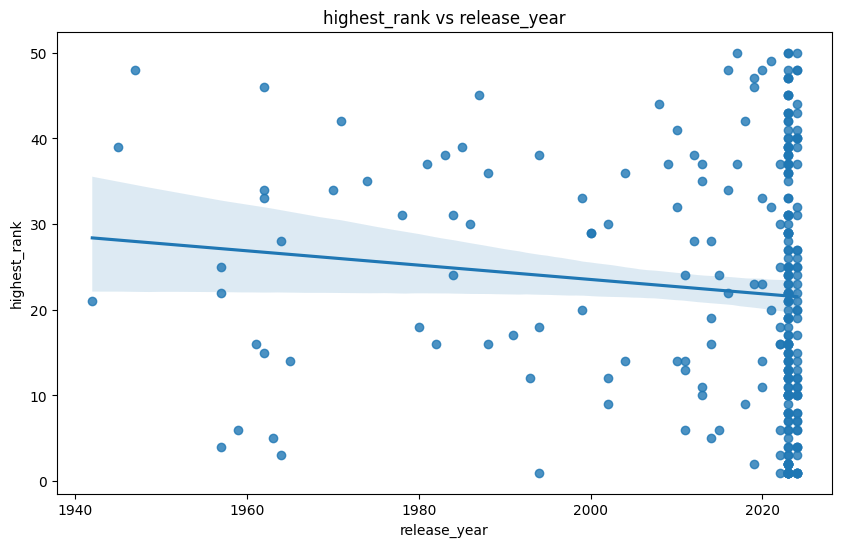

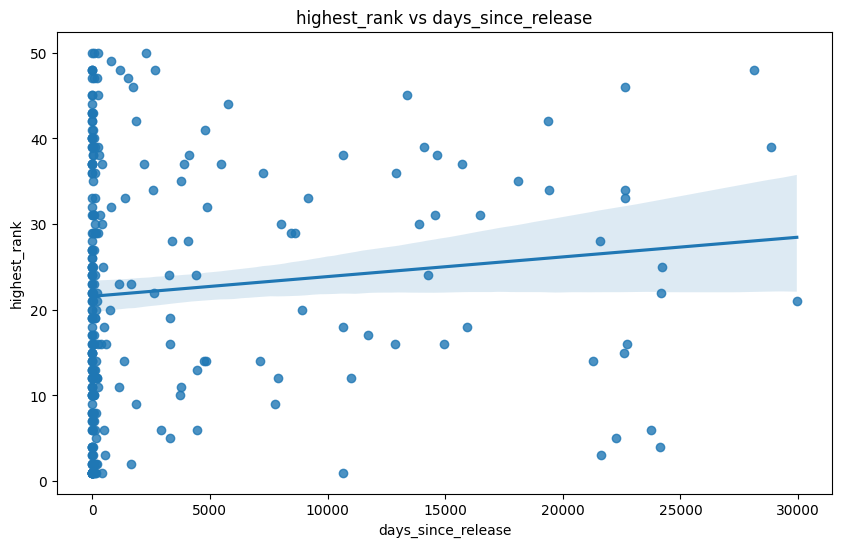

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['danceability', 'instrumentalness', 'acousticness', 'time_signature', 'release_year', 'days_since_release']
'mode', 'is_explicit'
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=df[feature], y=df['highest_rank'], data=df, scatter=True, fit_reg=True)
    plt.xlabel(feature)
    plt.ylabel('highest_rank')
    plt.title(f'highest_rank vs {feature}')
    plt.show()




Only thing that we can get from those plots is that ofcourse most of the popular daily songs are the new songs, released this year or the year ago and this is proven by comparing the `highest rank` with `days_since_reelase` and `release_year`.

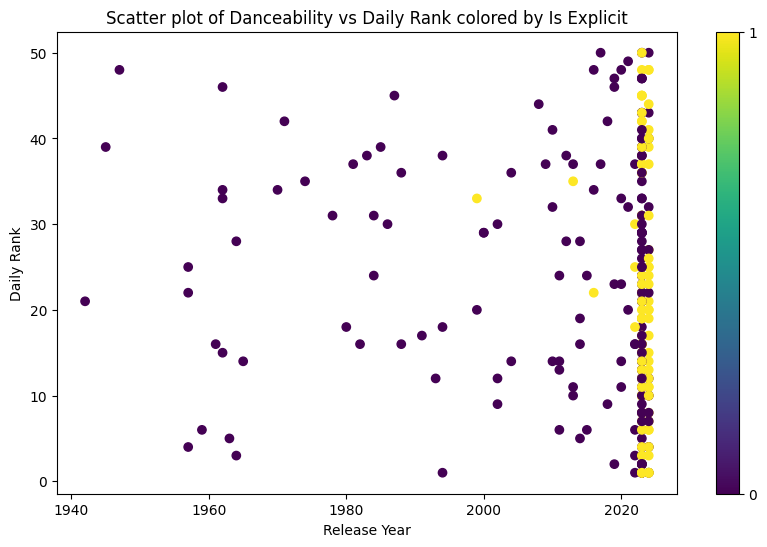

In [103]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['release_year'], df['highest_rank'], c=df['is_explicit'], vmin=0, vmax=1)
plt.xlabel('Release Year')
plt.ylabel('Daily Rank')
plt.title('Scatter plot of Danceability vs Daily Rank colored by Is Explicit')
plt.colorbar(scatter, ticks=[0, 1])
plt.show()


Unfortunately, the analysis reveals no significant correlation between the `highest rank` and the other features that exhibited high correlation in the map. This lack of correlation might suggest that the success of a song, as measured by its highest rank, cannot be easily predicted by these features. This finding underscores the subjective nature of music as an art form.

In [104]:
X = df[['danceability', 'mode', 'acousticness', 'is_explicit', 'time_signature']]
y = df['highest_rank']

# 6. Splitting the Data

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Model Bulding

In [106]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
                              n_estimators=38, 
                              random_state=42, 
                              max_features="sqrt", 
                              max_depth=10,
                              ccp_alpha=0.5
                              )



# 8. Model Training

In [107]:
model.fit(X_train, y_train)

RandomForestRegressor(ccp_alpha=0.5, max_depth=10, max_features='sqrt',
                      n_estimators=38, random_state=42)

# 9. Model Evaluation

In [108]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("RMSE scores for each fold: ", scores)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

RMSE scores for each fold:  [-0.02915886 -0.20158393 -0.09076827 -0.05737508 -0.01901583]
Mean Squared Error: 140.69484419506176
Root Mean Squared Error: 11.861485749899199


k-Fold cross-validation

k-Fold cross-validation is a technique that minimizes the disadvantages of the hold-out method. k-Fold introduces a new way of splitting the dataset which helps to overcome the “test only once bottleneck”.

In general, it is always better to use k-Fold technique instead of hold-out. In a head to head, comparison k-Fold gives a more stable and trustworthy result since training and testing is performed on several different parts of the dataset. We can make the overall score even more robust if we increase the number of folds to test the model on many different sub-datasets.

Still, k-Fold method has a disadvantage. Increasing k results in training more models and the training process might be really expensive and time-consuming.



In [109]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Assuming your model is named 'model' and your features and target are X and y respectively
kf = KFold(n_splits=5)  # n_splits parameter is the number of folds

mse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Print each of the scores
print("MSE scores for each fold: ", mse_scores)

# Print the average score
print("Average MSE score: ", np.mean(mse_scores))

MSE scores for each fold:  [219.17035093600742, 228.88644492768654, 230.4143227600973, 185.73866584588455, 198.15629542630214]
Average MSE score:  212.47321597919563


The greatest advantage of Leave-one-out cross-validation is that it doesn’t waste much data. We use only one sample from the whole dataset as a test set, whereas the rest is the training set. But when compared with k-Fold CV, LOOCV requires building n models instead of k models, when we know that n which stands for the number of samples in the dataset is much higher than k. It means LOOCV is more computationally expensive than k-Fold, it may take plenty of time to cross-validate the model using LOOCV.

Thus, the Data Science community has a general rule based on empirical evidence and different researches, which suggests that 5- or 10-fold cross-validation should be preferred over LOOCV.

In [110]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

loo = LeaveOneOut()

mse_scores = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

print("MSE scores for each fold: ", mse_scores)

print("Average MSE score: ", np.mean(mse_scores))

MSE scores for each fold:  [493.89905415272915, 65.88142432490005, 40.426744604258296, 10.507522644439169, 204.62185284233175, 97.7924187593269, 11.550901437461192, 444.2789528036194, 50.12873809535561, 28.226918401510442, 96.67853790644406, 26.779840624081046, 15.957088125929555, 519.8497292705457, 133.17825221339697, 214.78044692090893, 378.5194546555926, 32.20600303262416, 98.24423098349254, 49.48558603553849, 759.3562974838848, 13.22056409417315, 7.576315554532472, 99.91457306394263, 353.2270570156154, 75.08004334432883, 373.15322139395613, 300.95619172301554, 181.0561934530208, 35.91426918248397, 176.63162766948588, 265.61264984481187, 0.042673709664943105, 283.45317005302866, 394.8373216501742, 500.76224408629247, 119.49266204816398, 464.26206658508653, 50.66415254859757, 1036.3652771275774, 143.68603974708333, 565.4839352128222, 99.53410992808567, 614.7609246637612, 1.0892715773128974, 2.4356505432736837, 174.37378327546878, 1019.0023787505811, 8.051517007806543, 280.12448531726

In [111]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

tscv = TimeSeriesSplit(n_splits=5)

mse_scores = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

print("MSE scores for each fold: ", mse_scores)

print("Average MSE score: ", np.mean(mse_scores))

MSE scores for each fold:  [228.745515036821, 221.2037000211605, 229.53464183567993, 244.5892620763557, 183.1210980118394]
Average MSE score:  221.43884339637128


Nested k-Fold

Unlike the other CV techniques, which are designed to evaluate the quality of an algorithm, Nested k-fold CV is used to train a model in which hyperparameters also need to be optimized. It estimates the generalization error of the underlying model and its (hyper)parameter search.

The inner loop performs cross-validation to identify the best features and model hyper-parameters using the k-1 data folds available at each iteration of the outer loop. The model is trained once for each outer loop step and evaluated on the held-out data fold. This process yields k evaluations of the model performance, one for each data fold, and allows the model to be tested on every sample.

It is to be noted that this technique is computationally expensive because plenty of models is trained and evaluated. Unfortunately, there is no built-in method in sklearn that would perform Nested k-Fold CV for you.

In [112]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import numpy as np

outer_cv = KFold(n_splits=5, shuffle=True, random_state=1)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=1)

outer_scores = []

for train_index, test_index in outer_cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    inner_scores = cross_val_score(model, X_train, y_train, cv=inner_cv, scoring='neg_mean_squared_error')
    inner_scores = -1 * inner_scores  # cross_val_score returns negative scores for MSE, so we negate them
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    outer_scores.append(mse)
    
    print("Inner MSE scores: ", inner_scores)
    print("Mean of inner MSE scores: ", np.mean(inner_scores))


print("Outer MSE scores: ", outer_scores)

print("Average outer MSE score: ", np.mean(outer_scores))

Inner MSE scores:  [233.16352334 193.907289   243.12492384 245.08627151 206.51761425]
Mean of inner MSE scores:  224.3599243880789
Inner MSE scores:  [254.04026811 194.11677565 199.58105322 214.30502497 204.75776958]
Mean of inner MSE scores:  213.36017830894107
Inner MSE scores:  [243.99619934 212.18632873 190.73464207 215.6330562  259.32242716]
Mean of inner MSE scores:  224.37453070038964
Inner MSE scores:  [228.42223085 267.71078993 214.0051527  258.88101901 148.91804817]
Mean of inner MSE scores:  223.58744813232494
Inner MSE scores:  [219.24542664 224.30733314 207.64364649 198.28471038 249.54867254]
Mean of inner MSE scores:  219.80595783739687
Outer MSE scores:  [234.46233906372444, 244.26074040260713, 226.88819735531322, 253.31686288894502, 228.66213921539807]
Average outer MSE score:  237.51805578519756


In [118]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Assuming your features and target are X and y respectively
X = df[['danceability', 'mode', 'acousticness', 'is_explicit', 'time_signature']]
y = df['highest_rank']

# Define the model
model = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Define the random search
random_search = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
random_search.fit(X, y)

# Print the best parameters
print(random_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120

/Users/martinhristev/Documents/Fontys/Semester 4/Song Popularity Prediction Model/Spotify-Song-Ranking-Predictor-/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
74 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/martinhristev/Documents/Fontys/Semester 4/Song Popularity Prediction Model/Spotify-Song-Ranking-Predictor-/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/martinhristev/Documents/Fontys/Semester 4/Song Popularity Prediction Model/Spotify-Song

{'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [113]:
new_features = pd.DataFrame({
    'danceability': [0.594],
    'mode': [1],
    'acousticness': [0.189],
    'is_explicit': [1],
    'time_signature': [4]
})
predicted_rank = model.predict(new_features)

print(f"Predicted highest rank: {predicted_rank[0]}")

Predicted highest rank: 10.729219951588373


# Conclusion

After experimenting with different features and model configurations, I have come to different conclusions about the model. The choice of features greatly impacts the performance and predictive power of the model. By including or excluding certain features, I observed variations in the mean squared error (MSE) and root mean squared error (RMSE) values.

Additionally, the model configuration, such as the number of estimators, maximum depth, and regularization parameters, also played a significant role in the model's performance. Different combinations of these parameters resulted in different levels of accuracy and predictive power.

Although I observed variations in the mean squared error (MSE) and root mean squared error (RMSE) values when experimenting with different features and model configurations, I did not find a high correlation between the features. This suggests that music popularity is subjective and cannot be solely determined by a few specific features.

In future iterations, I plan to enhance the dataset by incorporating additional features obtained from the Spotify API. This will allow for further investigation into the subjective nature of music and its impact on popularity. By expanding the dataset, I aim to gain deeper insights into the factors that contribute to the subjective nature of music and its influence on popularity.



Unfortunately, the analysis reveals no significant correlation between the `highest rank` and the other features that exhibited high correlation in the map. This lack of correlation might suggest that the success of a song, as measured by its highest rank, cannot be easily predicted by these features. This finding underscores the subjective nature of music as an art form. It reminds us that while certain patterns and trends can be observed, the appeal of a song often transcends quantifiable characteristics, resonating with listeners on a deeply personal and emotional level.

# References